C1*C2*C3*R1*R2*R3*s**3/(C1*C2*C3*R1*R2*R3*s**3 + C1*C2*R1*R2*s**2 + C1*C3*R1*R2*s**2 + C1*C3*R1*R3*s**2 + C1*R1*s + C2*C3*R1*R2*s**2 + C2*C3*R1*R3*s**2 + C2*C3*R2*R3*s**2 + C2*R1*s + C2*R2*s + C3*R2*s + C3*R3*s + 1)


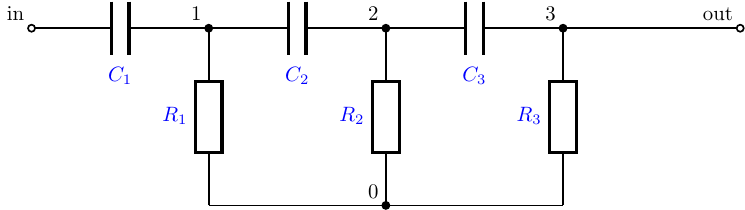

In [1]:
from lcapy import Circuit, s,jomega
# Define the circuit using a netlist
cct = Circuit("""
C1 in 1; right
R1 1 0_1; down
C2 1 2; right
R2 2 0; down
W 0_1 0
C3 2 3; right
R3 3 0_2; down
W 0 0_2
W 3 out; right
; draw_nodes=connections, node_spacing=3, scale=0.5, style=european, bipole label style={color=blue}
""")

# Calculate the transfer function
# Here, the transfer function is calculated from node 1 to node 2
H = cct.transfer("in", 0, "out", 0)

# The transfer function H is now defined in the Laplace domain
print(H.simplify())
cct.draw()

In [2]:
import pandas as pd

D:/scoop/apps/msys2/2023-10-26/tmp/ipykernel_3800/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


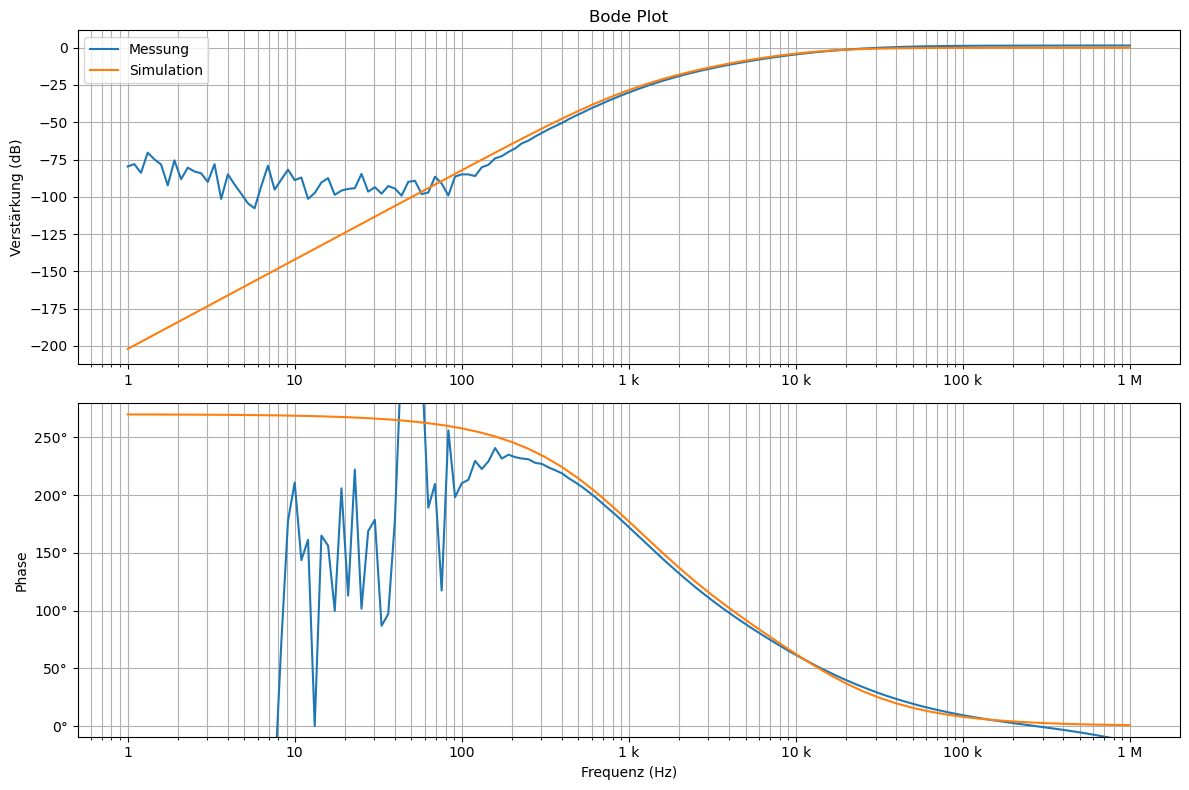

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
# Loading the data from the CSV file
df = pd.read_csv("messung_hochpass_passiv_bode.csv", delimiter=',', comment='#',encoding = 'ISO-8859-1')
df2= pd.read_csv("hochpass_passiv_1khz_bode.csv", delimiter=';')
# Helper functions for formatting labels
def format_freq(x, pos):
    """Format frequency axis with SI unit prefixes."""
    if x >= 1e9:
        return '{:1.0f} G'.format(x*1e-9)
    elif x >= 1e6:
        return '{:1.0f} M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f} k'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

def format_phase(x, pos):
    """Add degree symbol to phase axis."""
    return '{:1.0f}\u00B0'.format(x)  # \u00B0 is the unicode for degree symbol

plt.figure(figsize=(12, 8))

# Plotting Magnitude
plt.subplot(2, 1, 1)
plt.semilogx(df['Frequency (Hz)'], df['Channel 2 Magnitude (dB)']-df['Channel 1 Magnitude (dB)'], label='Messung')
plt.semilogx(df2['frequency'], df2['V(U_a) (mag)'], label='Simulation')
plt.title('Bode Plot')
plt.ylabel('Verstärkung (dB)')
plt.grid(True, which='both')
plt.legend()
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_freq))

# Plotting Phase
plt.subplot(2, 1, 2)
phase=np.unwrap(df['Channel 2 Phase (deg)'],period=360)
plt.semilogx(df['Frequency (Hz)'], phase-np.round(phase[-1]/360)*360)
phase= np.unwrap(df2['V(U_a) (phase)'],period=360)
plt.semilogx(df2['frequency'], phase-np.round(phase[-1]/360)*360, label='Simulation')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Phase')
y_min = min(phase-np.round(phase[-1]/360)*360) - 10  # Adjust the offset as needed
y_max = max(phase-np.round(phase[-1]/360)*360) + 10  # Adjust the offset as needed
plt.ylim(y_min, y_max)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_freq))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_phase))
plt.grid(True, which='both')
plt.tight_layout()
plt.savefig("hochpass3ordnungbode.pdf")
plt.show()
